In [1]:
!pip install scikit-image
!pip install numpy
!pip install matplotlib
!pip install scipy
!pip install opencv-python



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import medial_axis
import cv2 as cv
from time import time

# TODO 
# Estimate_horagraphyDLT22, transformvec, translation2D 
# Las ultimas 2 creo que estan en el repo de graficas de Denis

In [3]:
MIN_MATCH_COUNT = 3



sift = cv.SIFT_create()

In [4]:
path = 'imgs/cuar/'

img_ext = '.jpg'
imgnumber = 3

im = [] 

for i in range(1,imgnumber+1):
    full_name = path + str(i) + img_ext
    im.append(cv.imread(full_name,0))



In [5]:
shapes = np.zeros((imgnumber,2)).astype(int)

for i in range(imgnumber):
    shapes[i,:] = im[i].shape

print(shapes)

[[2992 2992]
 [2992 2992]
 [2992 2992]]


In [6]:
kps =[] 
des = []

for i in range(imgnumber):
    kp, ds = sift.detectAndCompute(im[i],None)
    kps.append(kp)
    des.append(ds)
    print('Image ' + str(i) + ' has ' + str(len(kp)) + ' keypoints')

print(len(kps))

Image 0 has 36924 keypoints
Image 1 has 41683 keypoints
Image 2 has 25954 keypoints
3


In [7]:
bf = cv.BFMatcher()

matches = []
goods = []

for i in range(1,imgnumber):
    matche = bf.knnMatch(des[i],des[i-1],k=2)
    matches.append(matche)

    print("Total matches from image {} to image {} are {}".format(i+1,1,len(matche)))

    good = []

    for m,n in matche:
        if m.distance < 0.45*n.distance:
            good.append(m)

    goods.append(good)
    print("Good matches from image {} to image {} are {}".format(i+1,i,len(good)))

print(len(goods))

Total matches from image 2 to image 1 are 41683
Good matches from image 2 to image 1 are 124
Total matches from image 3 to image 1 are 25954
Good matches from image 3 to image 2 are 402
2


In [8]:
out = np.zeros((1,1,3))

for i in range(1, imgnumber):
    if len(goods[i-1]) > 0:  # Check if there are good matches
        # Swap im[i] and im[i-1] to match the sequence in goods[i-1]
        draw = cv.drawMatches(im[i-1], kps[i-1], im[i], kps[i], goods[i-1], out, flags=2)
        draw = cv.resize(draw, (1280, 720))
        cv.imshow('Matches', draw)
        if cv.waitKey(0) & 0xFF == 27:  # Press 'ESC' to quit
            break

    else:
        print(f"No good matches between image {i} and {i-1}.")

cv.destroyAllWindows()

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\features2d\src\draw.cpp:242: error: (-215:Assertion failed) i2 >= 0 && i2 < static_cast<int>(keypoints2.size()) in function 'cv::drawMatches'


## Estimate Homographies

In [ ]:
# import numpy as np
# import cv2 as cv

# H = [np.eye(3)]

# # Establece el valor mínimo para las coincidencias que sean lo suficientemente significativas
# MIN_MATCH_COUNT = 3

# for i in range(1, imgnumber):
#     if i - 1 < len(goods) and i < len(kps):
#         good_matches = goods[i - 1]
#         print(f"Found {len(good_matches)} good matches between images {i} and {i - 1}")

#         if len(good_matches) > MIN_MATCH_COUNT:
#             src_pts = np.float32([kps[i][m.queryIdx].pt for m in good_matches if m.queryIdx < len(kps[i])])
#             dst_pts = np.float32([kps[i - 1][m.trainIdx].pt for m in good_matches if m.trainIdx < len(kps[i - 1])])

#             if len(src_pts) == len(dst_pts) and len(src_pts) > MIN_MATCH_COUNT:
#                 src_pts = src_pts.reshape(-1, 1, 2)
#                 dst_pts = dst_pts.reshape(-1, 1, 2)

#                 hprev = H[-1]
#                 h, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC, 3.0)

#                 if h is not None:
#                     H.append(h @ hprev)
#                 else:
#                     H.append(hprev)
#                     print(f"Failed to find a valid homography between image {i} and {i - 1}")
#             else:
#                 H.append(H[-1])
#                 print(f"Insufficient valid matches between images {i} and {i - 1}")
#         else:
#             H.append(H[-1])
#             print(f"Not enough matches between images {i} and {i - 1}")
#     else:
#         H.append(H[-1])
#         print(f"Index out of range or invalid data at image {i}")


Found 120 good matches between images 1 and 0
Insufficient valid matches between images 1 and 0
Found 449 good matches between images 2 and 1
Insufficient valid matches between images 2 and 1


In [ ]:
# import numpy as np
# import cv2 as cv

# # Establecer una cantidad mínima de coincidencias para aceptar una homografía
# MIN_MATCH_COUNT = 10
# # Inicializar con una matriz identidad
# H = [np.eye(3)]  

# for i in range(1, imgnumber):
#     # Verificar si hay suficientes coincidencias
#     if len(goods[i - 1]) >= MIN_MATCH_COUNT:
#         # Obtener las correspondencias válidas entre las dos imágenes
#         valid_pairs = [(m.queryIdx, m.trainIdx) for m in goods[i - 1]
#                        if m.queryIdx < len(kps[i]) and m.trainIdx < len(kps[i - 1])]

#         # Verificar nuevamente si hay suficientes coincidencias después del filtrado
#         if len(valid_pairs) >= MIN_MATCH_COUNT:
#             # Extraer los puntos correspondientes
#             src_pts = np.float32([kps[i][idx1].pt for idx1, _ in valid_pairs]).reshape(-1, 1, 2)
#             dst_pts = np.float32([kps[i - 1][idx2].pt for _, idx2 in valid_pairs]).reshape(-1, 1, 2)

#             # Mostrar un mensaje indicando la correspondencia de imágenes
#             print(f'Matching image {i} with image {i - 1}, OK')

#             # Obtener la última homografía calculada
#             hprev = H[-1]

#             # Calcular la nueva homografía usando RANSAC
#             h, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC, 5.0)

#             if h is not None:
#                 # Combinar la homografía calculada con la última
#                 H.append(h @ hprev)
#             else:
#                 # Usar la última homografía si el cálculo falla
#                 H.append(hprev)
#                 print(f"Failed to find a valid homography for image {i} and {i - 1}")
#         else:
#             # Usar la última homografía si no hay suficientes pares válidos
#             H.append(H[-1])
#             print(f"Not enough valid pairs after index check between image {i} and {i - 1}")
#     else:
#         # Usar la última homografía si no hay suficientes coincidencias
#         H.append(H[-1])
#         print(f"Not enough matches between image {i} and {i - 1}")



In [ ]:
src_pts = np.float32([kps[2][m.queryIdx].pt for m in goods[2-1]]).reshape(-1, 1, 2)

len(src_pts),len(goods),len(kps)

(402, 2, 3)

In [ ]:
import numpy as np
import cv2 as cv

# Establecer una cantidad mínima de coincidencias para aceptar una homografía
MIN_MATCH_COUNT = 3
# Inicializar con una matriz identidad
H = [np.eye(3)]  

for i in range(1, imgnumber):
    # Verificar si hay suficientes coincidencias
    if len(goods[i - 1]) >= MIN_MATCH_COUNT:

            src_pts = np.float32([kps[i][m.queryIdx].pt for m in goods[i-1]]).reshape(-1, 1, 2)
            dst_pts = np.float32([kps[i - 1][m.queryIdx].pt for m in goods[i-1]]).reshape(-1, 1, 2)

            # Mostrar un mensaje indicando la correspondencia de imágenes
            print(f'Matching image {i+1} with image {i}, OK')

            # Obtener la última homografía calculada
            hprev = H[i-1]

            # Calcular la nueva homografía usando RANSAC
            h, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC, 5.0)
            H.append(h @ hprev)

    else:
        # Usar la última homografía si no hay suficientes coincidencias
        H.append(H[-1])
        print(f"Not enough matches between image {i} and {i - 1}")



Matching image 2 with image 1, OK
Matching image 3 with image 2, OK


In [35]:
for i in range(0,imgnumber):
    print(H[i])

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[ 6.63382121e+00  6.42898311e+00 -7.00363532e+03]
 [-9.89020503e+00  1.44469352e+01 -3.53166459e+03]
 [-1.15610310e-03  3.02829248e-03  1.00000000e+00]]
[[ 1.54255098e+00  4.06368642e+00 -2.85857703e+03]
 [-2.34392222e+01  7.94169227e+00  8.58171963e+03]
 [-5.71066589e-03  1.57442714e-03  4.08734231e+00]]


In [36]:
# change panorama tro based at central image
center = imgnumber//2
if (center > 0):
    for i in range(imgnumber):
        H[i] = np.linalg.inv(H[center]) @ H[i]
    
    H[center] = np.eye(3)

In [37]:
print('Homographies adjusted to central image')
for i in range(imgnumber):
    print(H[i])

Homographies adjusted to central image
[[ 7.19559737e-02 -7.91000719e-02  2.24598476e+02]
 [ 3.99912240e-02 -4.18740173e-03  2.65295451e+02]
 [-3.79165989e-05 -7.87671608e-05  4.56266775e-01]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[ 1.54255098e+00  4.06368642e+00 -2.85857703e+03]
 [-2.34392222e+01  7.94169227e+00  8.58171963e+03]
 [-5.71066589e-03  1.57442714e-03  4.08734231e+00]]


In [38]:
# computing mapping boxes
from panorama import transformvec
dims = np.zeros((imgnumber,2,4))
for i in range(imgnumber):
    h, w = shapes[i]
    scorners = np.array([[0,0,1],[w,0,1],[w,h,1],[0,h,1]]).T
    tcorners = transformvec(H[i],scorners)
    dims[i,:,:] = tcorners[:2,:]

print(dims)

[[[  492.25253223  1283.1525267   1896.64297179   -54.71074094]
  [  581.4481027   1122.88910677  3475.72636793  1145.83853625]]

 [[    0.          2992.          2992.             0.        ]
  [    0.             0.          2992.          2992.        ]]

 [[ -699.3730428   -135.14420767 -1678.91027891  1057.05192198]
  [ 2099.58427261  4734.86999412  4559.0727482   3676.19445894]]]


In [39]:
wmin = np.min(dims[:,0,:])
wmax = np.max(dims[:,0,:])
hmin = np.min(dims[:,1,:])
hmax = np.max(dims[:,1,:])
print(wmin,wmax,hmin,hmax)

-1678.9102789126168 2992.0 0.0 4734.869994117881


In [40]:
e =10
wmin = np.round(wmin).astype(int) - e
wmax = np.round(wmax).astype(int) + e
hmin = np.round(hmin).astype(int) - e
hmax = np.round(hmax).astype(int) + e
print(wmin,wmax,hmin,hmax)

-1689 3002 -10 4745


In [41]:
# transalte all coordinates by -(wmin,hmin)
from panorama import translation2D
T = translation2D(np.array([-wmin,-hmin,1.]))
for i in range(imgnumber):
    H[i] = T @ H[i]

In [42]:
# computing mapping boxes

dims = np.zeros((imgnumber,2,4))
for i in range(imgnumber):
    h, w = shapes[i]
    scorners = np.array([[0,0,1],[w,0,1],[w,h,1],[0,h,1]]).T
    tcorners = transformvec(H[i],scorners)
    dims[i,:,:] = tcorners[:2,:]

print(dims)

[[[2181.25253223 2972.1525267  3585.64297179 1634.28925906]
  [ 591.4481027  1132.88910677 3485.72636793 1155.83853625]]

 [[1689.         4681.         4681.         1689.        ]
  [  10.           10.         3002.         3002.        ]]

 [[ 989.6269572  1553.85579233   10.08972109 2746.05192198]
  [2109.58427261 4744.86999412 4569.0727482  3686.19445894]]]


## CRATE PANORAMA

In [43]:
def warp(I,y,x,mode="nearest"):
    if (mode == "nearest"):
        u = np.round(x).astype(int)
        v = np.round(y).astype(int)
        pix = I[v,u]
    elif (mode == "bilinear"):
        u = x.astype(int)
        v = y.astype(int)
        a = x - u
        b = y - v
        pix = (1-a)*(1-b)*I[v,u] + a*(1-b)*I[v,u+1] + a*b*I[v+1,u+1] + (1-a)*b*I[v+1,u]
    return pix

In [44]:
def warp_order(N):
    prev = np.arange(0,N//2)
    succ = np.arange(N//2+1,N)[::-1]
    order =[]

    if (N%2 == 0):
        for i in range(len(succ)):
            order.append(prev[i])
            order.append(succ[i])
    else:
        for i in range(len(succ)):
            order.append(prev[i])
            order.append(succ[i])
        order.append(prev[-1])
    order.append(N//2)
    return order


In [45]:
panorama = np.zeros((hmax-hmin,wmax-wmin,3))
panorama_blend = np.zeros((hmax-hmin,wmax-wmin,3))
panors = np.zeros((hmax-hmin,wmax-wmin,3,imgnumber)).astype(np.uint8)
masks = np.zeros((hmax-hmin,wmax-wmin,imgnumber)).astype(np.uint8)
weight = np.zeros((hmax-hmin,wmax-wmin,imgnumber))

print(panorama.shape)

(4755, 4691, 3)


In [46]:
a = np.arange(0,imgnumber)

tic = time()
for k in a[::-1]:
    # finding searching box
    h, w = shapes[k]
    sbox = np.array([[0,0,1.],[0,h,1.],[w,h,1.],[w,0,1.]]).T
    tbox = transformvec(H[k],sbox)
    xmin = tbox[0,:].min()
    xmax = tbox[0,:].max()
    ymin = tbox[1,:].min()
    ymax = tbox[1,:].max()
    d=1
    xrange = np.arange(xmin-d,xmax+d).astype(int)
    yrange = np.arange(ymin-d,ymax+d).astype(int)
    Hinv = np.linalg.inv(H[k])

    #computiong projected imaged only ionside box
    for i in xrange:
        for j in yrange:
            p = np.round(transformvec(Hinv,np.array([[i,j,1]]).T)).astype(int)
            x, y = p[0,0], p[1,0]
            if (x >= 0 and x < w and y >= 0 and y < h):
                panors[j,i,:,k]= warp(im[k],y,x,mode="nearest")
                masks[j,i,k] = 1
    
    print('Image {} warped,OK'.format(k+1))

toc = time()
print('Warping time: {} s'.format(toc-tic))


C:\Users\angel\AppData\Local\Temp\ipykernel_1564\2841394401.py:21: RuntimeWarning: invalid value encountered in cast
  p = np.round(transform22(Hinv,np.array([[i,j,1]]).T)).astype(int)


Image 3 warped,OK
Image 2 warped,OK
Image 1 warped,OK
Warping time: 195.91650581359863 s


In [47]:
panorama = np.zeros((hmax-hmin,wmax-wmin,3))
for i in warp_order(imgnumber):
    mask = np.stack([masks[:,:,i],masks[:,:,i],masks[:,:,i]],axis=2)
    panorama = panorama*(1-mask) + panors[:,:,:,i]*mask

In [48]:
panorama = panorama.astype(np.uint8)

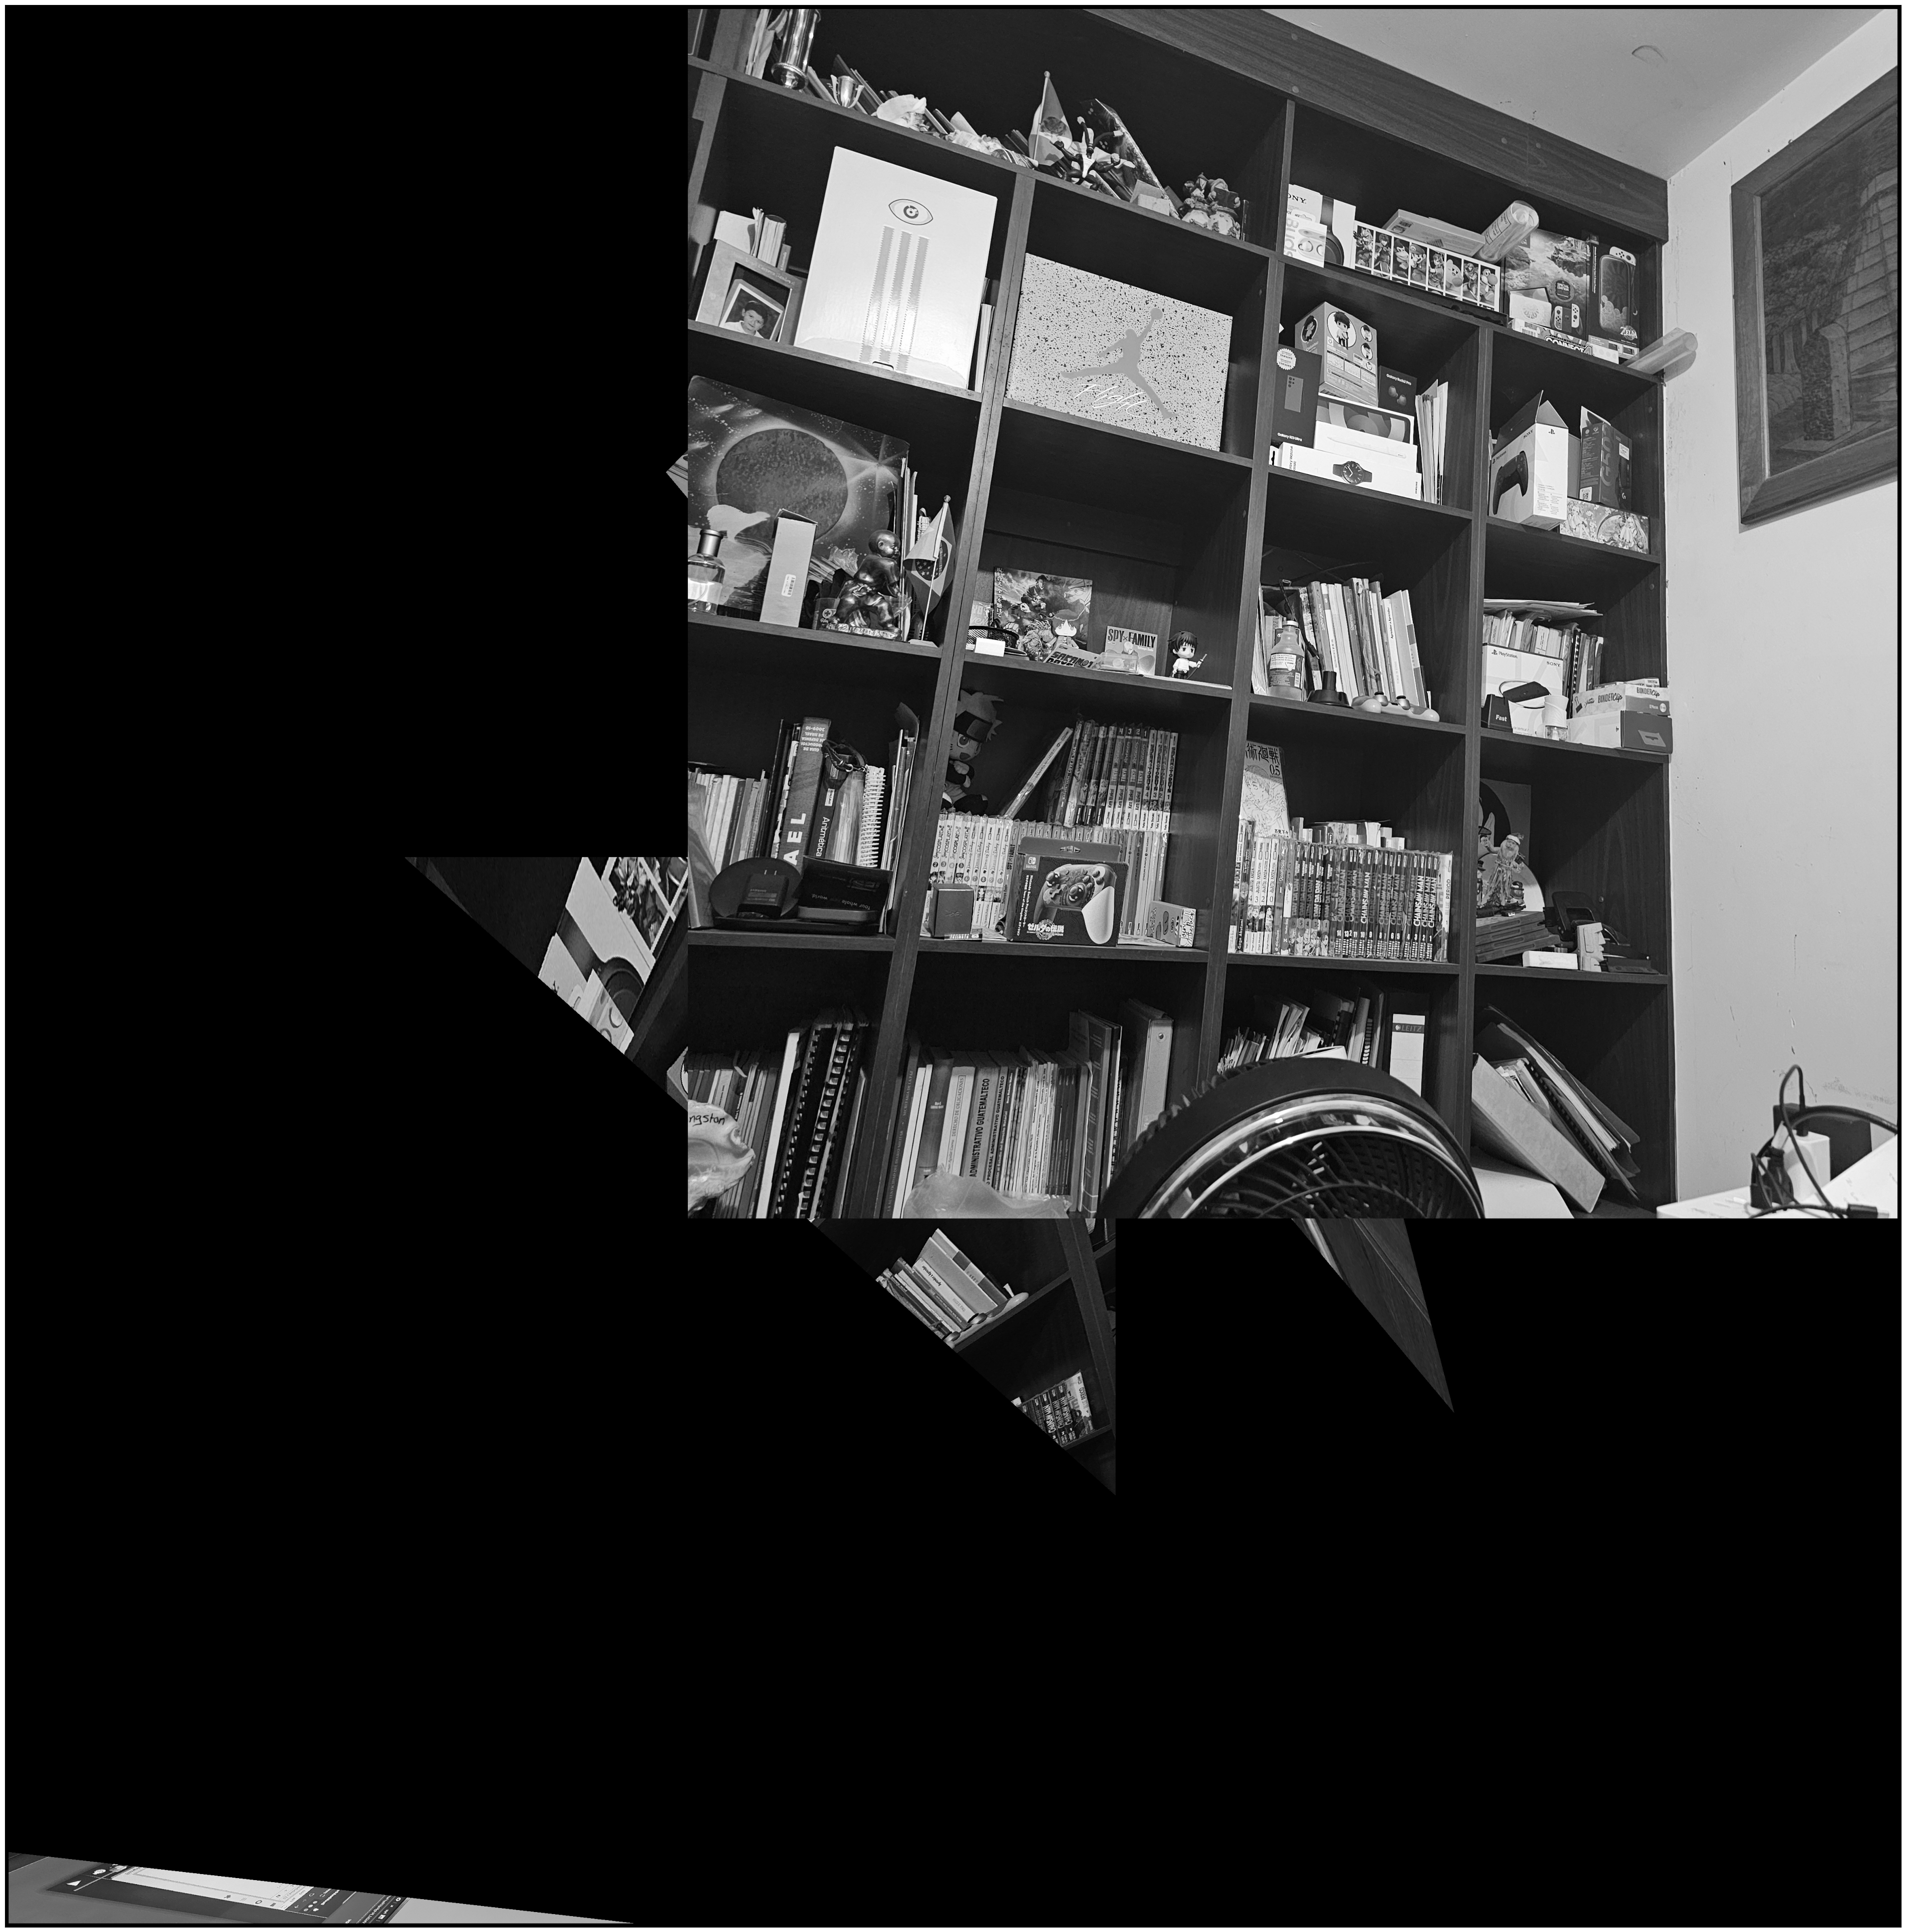

In [49]:
plt.figure(figsize=(50,50))
plt.imshow(panorama)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()